# Tarea N°3: Pregunta 1

### César Cerda Bollmann

In [26]:
install.packages('tidyr')
install.packages('ggplot2')
install.packages('data.table')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [27]:
library(purrr)
library(ggplot2)
library(data.table)

### a) Gráfico la función densidad

In [48]:
x=seq(-10,10,0.1)
y=1:length(x)
for (i in 1:length(x)) {
    if (x[i]<0){
        y[i]=0.5*exp(x[i])
    } else if(x[i]>=0) {     
        y[i]=0.5*exp(-x[i])
    }
}

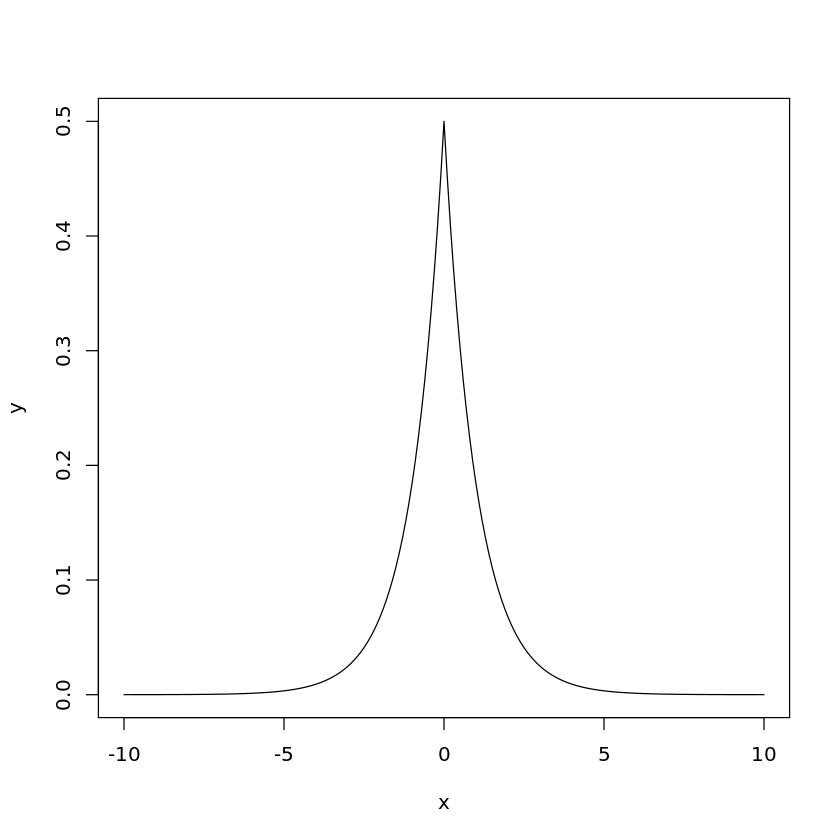

In [49]:
plot(x,y,type='l')

### b)Gráfico de F(x)

In [17]:
X = seq(-10,10,0.1)
F = 1:length(X)
for (i in 1:length(X)){
    if (X[i]<0){
        F[i] = 0.5*exp(X[i])
        }
    if (X[i]>=0){
        F[i]= 1- 0.5*exp(-X[i])
        }
    }

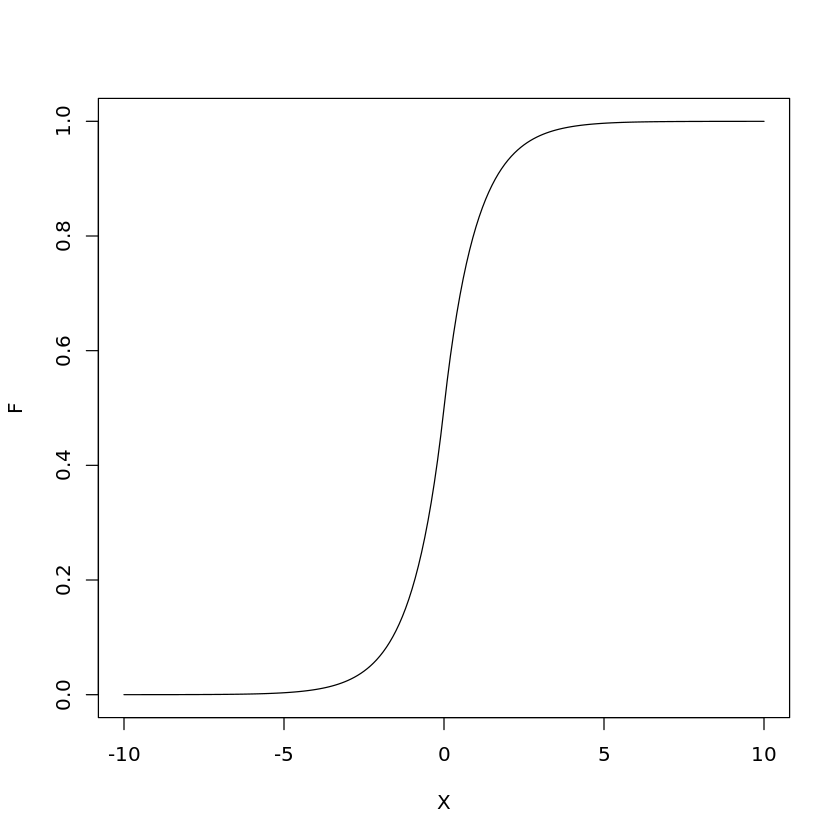

In [44]:
plot(X,F,type='l')

In [50]:
sample_data <- data.frame(y)

In [ ]:
geom_function(fun=ecdf(PT))

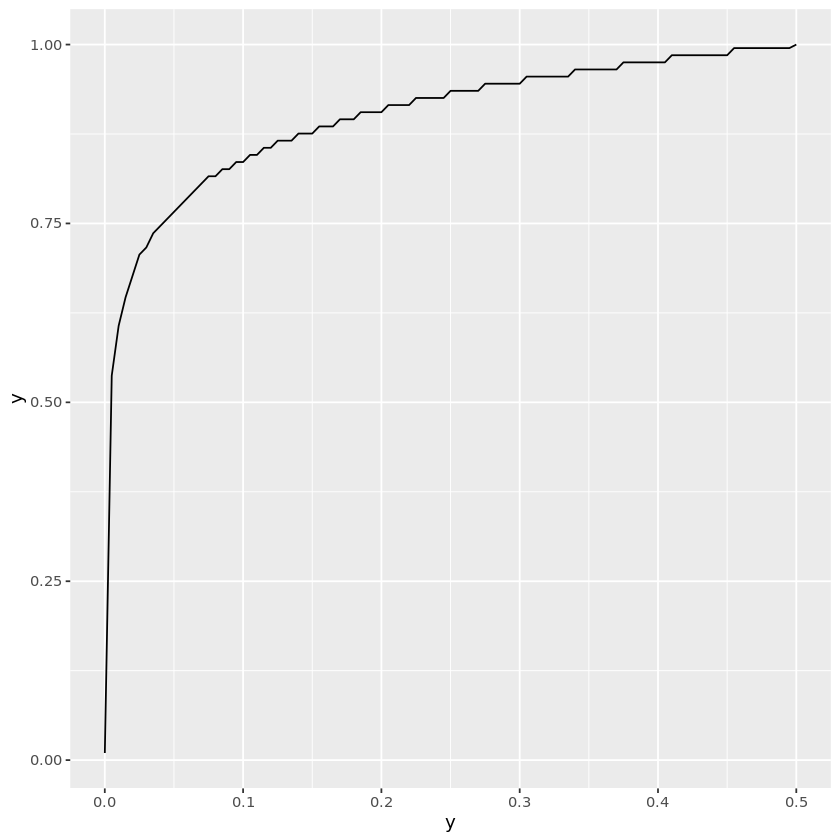

In [52]:
ggplot(sample_data, aes(y)) + geom_function(fun=ecdf(y))
  
# stat_ecdf() function is used to plot ECDF plot
#stat_ecdf()

In [37]:
# plotfig2 <- ggplot(as.data.frame(F),aes(F))+
#         theme(plot.title = element_text(size = 15),
#               axis.title.y=element_text(size = 20),
#               axis.title.x=element_text(size = 20))
pfin2 = ggplot(as.data.frame(F),aes(F))+geom_function(fun=ecdf(F))
         xlim(-10,10)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de las ",N," simulaciones del precio final")) 
pfin2

ERROR: Error: Cannot add ggproto objects together. Did you forget to add this object to a ggplot object?


In [21]:
P0 <- 100  #Precio actual
mu <- 0.08 #Drift (anual)
sigma <- 0.12 #Volatilidad (anual)
T <- 0.5 #Horizonte (años)

## Empecemos con una simulación de los precios apenas en el periodo final $T$

### Generamos $N$ muestras de los precios en el periodo $T$: $$P(T)=P(0)\exp\left((\mu-\sigma^2/2)T+\sigma\sqrt{T}\,Z\right), \quad Z\sim \text{Normal}(0,1)$$

In [28]:
N <- 500
log_cambio <- (mu-sigma^2/2)*T + sigma*sqrt(T)*rnorm(N,0,1)
PT <- P0*exp(log_cambio)

In [32]:
PT

[1] 115.61637  91.90102  84.91597  96.86606 114.24451 103.07820 103.40854
  [8] 125.10867 105.35930 101.91506  93.70823 120.92335 118.65069 107.51704
 [15]  95.02498  92.43294 114.75282  91.04379 108.05750 107.23913 106.44796
 [22] 104.67277 115.91914 107.85238  98.80298  97.61658  98.14904 110.40692
 [29] 104.62118 114.64008 103.65067  90.34742 120.47762 104.26811  97.81614
 [36] 102.32982 111.17499  99.38807 101.28380 106.95504 100.28273 105.38499
 [43] 111.93361 111.51710  83.59348  88.15224 102.16965 116.76180 114.29904
 [50] 113.54974  98.37325 105.45257 105.33712  95.57212 107.30056 101.11194
 [57] 113.06001  97.21394  93.96371 101.66266  94.32232 108.02377  98.95317
 [64] 111.64167 107.13658  96.10458  89.58597 119.06908 103.73220 109.97306
 [71] 108.08372  92.51107  94.04860 102.19694  96.30397 111.97860 116.13685
 [78] 103.91232  95.55127 117.13129 104.99700 108.17928  99.33627  81.62740
 [85] 110.50711  89.06880  98.46652 120.65895  92.70456  96.31253  96.70955
 [92] 102.60341 116.03514 100.09214  94.42302 106.73885  99.71440 125.10196
 [99]  95.14586 104.50256 105.49020 104.00299  94.75900 106.72148 111.34005
[106] 108.50657  94.80514 115.26932 108.35030 103.56864 105.68400 108.14504
[113]  99.97809 119.04638  89.25689 105.84375  96.97626 107.77784  97.15653
[120]  85.14339 107.09792 114.18026  97.02132  97.52090  92.88896  91.43736
[127]  96.97368 114.91923 108.92736 105.20034  94.80132 101.94262  97.24590
[134] 102.55270 104.88610 116.01933 105.94659 115.72203  99.10467 100.92797
[141]  89.60033 101.52026 106.28369  96.27335  97.22159 104.04913 102.74168
[148] 102.39302  95.50869 113.15898 100.31216  94.36859  86.49765 102.93685
[155] 114.15327 109.04456 106.37447 108.62505 101.52319  97.76716  98.80397
[162] 100.59743  95.78630 102.88621  97.64647  97.78650 119.16216  87.71958
[169] 101.30537 100.99523  97.53110 106.26424  92.23229 101.16122 118.91090
[176] 101.72943  99.96560 117.60395 108.23607 102.31459 107.63525 113.43121
[183]  99.59072 103.02981  90.98901 100.25854 111.11144 103.98157  94.94206
[190]  92.25634  93.04632 103.43937 100.92348 113.83117  96.97596  95.21550
[197] 107.84481 113.14041  88.17937  97.70484  99.10155  93.51694 102.08436
[204]  96.07792 108.25016  94.32899 133.98767 107.98353 111.43329 123.69835
[211] 110.12416 106.27879 118.00157  88.54473 112.49122 115.12456  99.81672
[218] 102.04684 106.34329  99.38197  93.64330 104.85897  94.20819  91.91063
[225]  92.83412 104.55601  97.56859 102.42331 106.51010 103.46125  94.82199
[232] 109.79872 106.18922  93.29517  90.11427  97.61013 103.21287 104.50561
[239]  93.90679 111.44414  92.61054 113.26980 100.77223 114.43972  90.56688
[246]  91.76786 113.93685 107.87367  89.31512 120.46761 117.61622 111.13429
[253] 102.90082 142.42604  96.65537 124.87897 101.95901 100.59087 107.77148
[260] 111.83448  95.04027  96.56582 113.15070 109.71730  94.20793  99.94310
[267] 105.93084 103.61996 103.16487  95.78288  90.91264 103.51971 106.00572
[274] 106.19268 111.83079  85.73299 103.17108 103.70102 103.94215 100.60807
[281]  96.77658 101.62738 104.63707 132.57094 107.41759 110.10797 109.44380
[288]  96.94464 113.92276  92.90918 102.31475 119.29826 108.86845 115.21871
[295]  97.09862 112.83028 103.95783 117.98317 107.12410  95.34963 100.61892
[302] 114.02257 119.82564 112.19268  95.41422 108.55429  95.18531  98.72215
[309] 102.31644  89.90271 114.61869 111.50852  97.73936 101.64219  96.41617
[316] 105.27252  95.52689  92.18333 110.09990 109.18611  99.94307 114.10688
[323] 116.26766 102.47526  97.54077 105.62860 108.02300 106.54446 107.95021
[330]  98.24716 107.46270 101.52313  91.32471  98.80721  99.41321  92.26889
[337] 103.67043  98.57376 102.94419  94.01789 102.77802 104.27692  94.27652
[344]  94.41155  98.26727 105.97676 104.53499  94.52764 106.26234  96.99081
[351] 102.17047 103.42240 107.82018 100.80991  97.38174  99.17180 110.40672
[358] 101.15772  85.54316 119.47591  94.74183  95.44182  98.91076  97.36545
[365]  90.55858  99.79764  84.54607 116.85123 102.

### Extraimos los precios, veamos un histograma

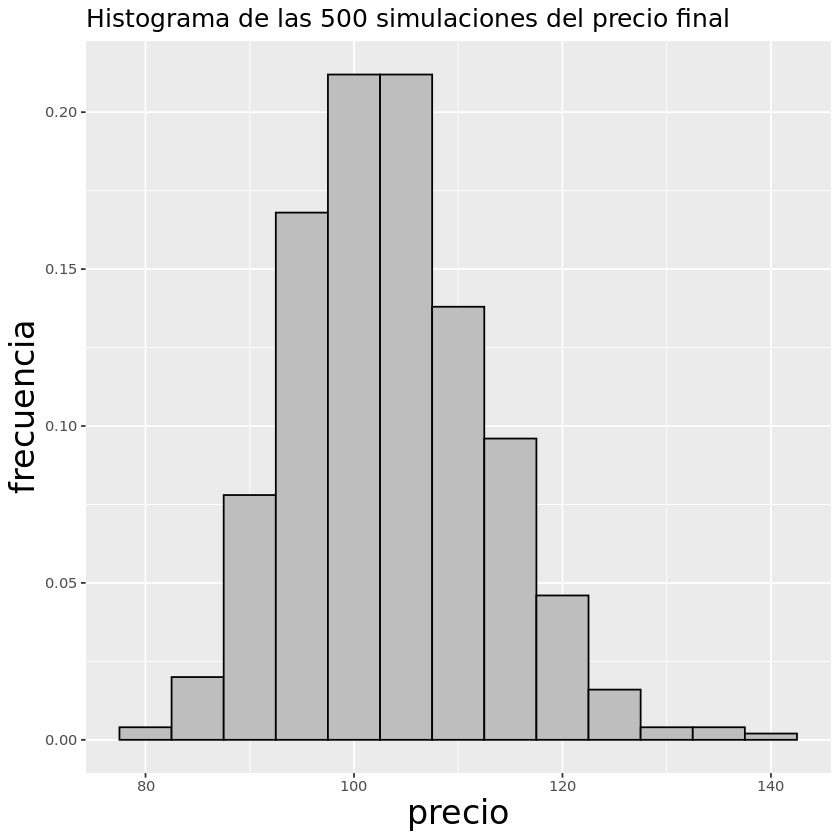

In [29]:
bin <- 5
plotfig <- ggplot(as.data.frame(PT),aes(PT))+
        theme(plot.title = element_text(size = 15),
              axis.title.y=element_text(size = 20),
              axis.title.x=element_text(size = 20))
 
p <- plotfig+geom_histogram(aes(y = after_stat(count /(sum(count)))), binwidth=bin, color="black", fill="gray")+
       labs(x="precio",
            y="frecuencia",
            title=paste0("Histograma de las ",N," simulaciones del precio final"))

#p <- p+ geom_vline(aes(xintercept=mean(PT)),
#            color="blue", linetype="dashed", size=1)
           
p 

### Ahora veamos un boxplot

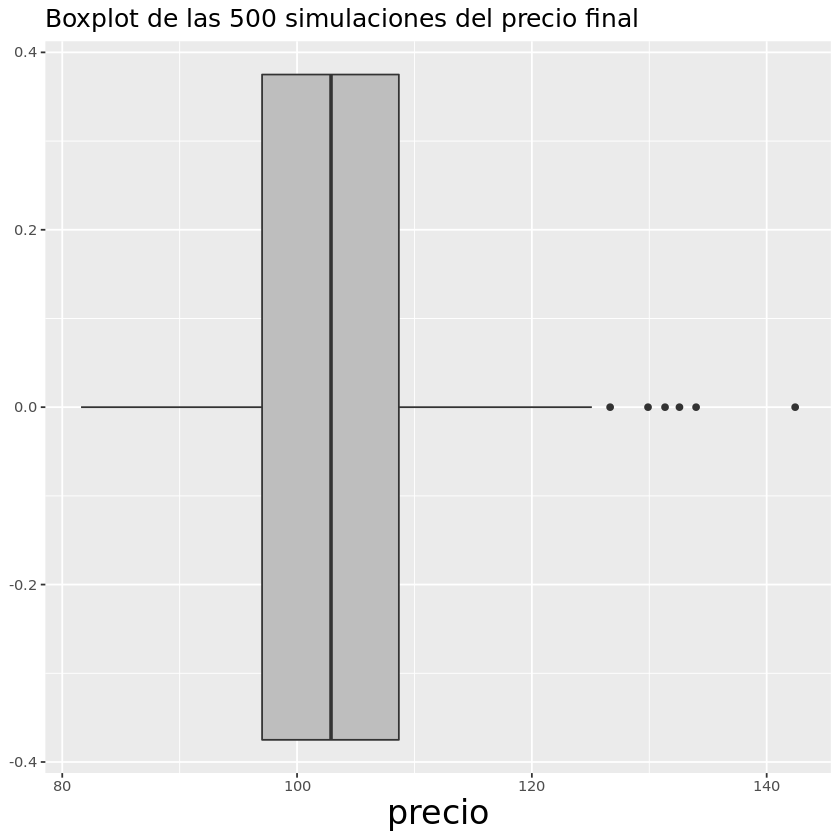

In [30]:
plotfig+ geom_boxplot(fill="gray")+
         labs(x="precio",
              title=paste0("Boxplot de las ",N," simulaciones del precio final"))

### Calculemos cuantiles

In [ ]:
quantile(PT,probs=0.60) 

### Veamos el gráfico de la cdf empirica

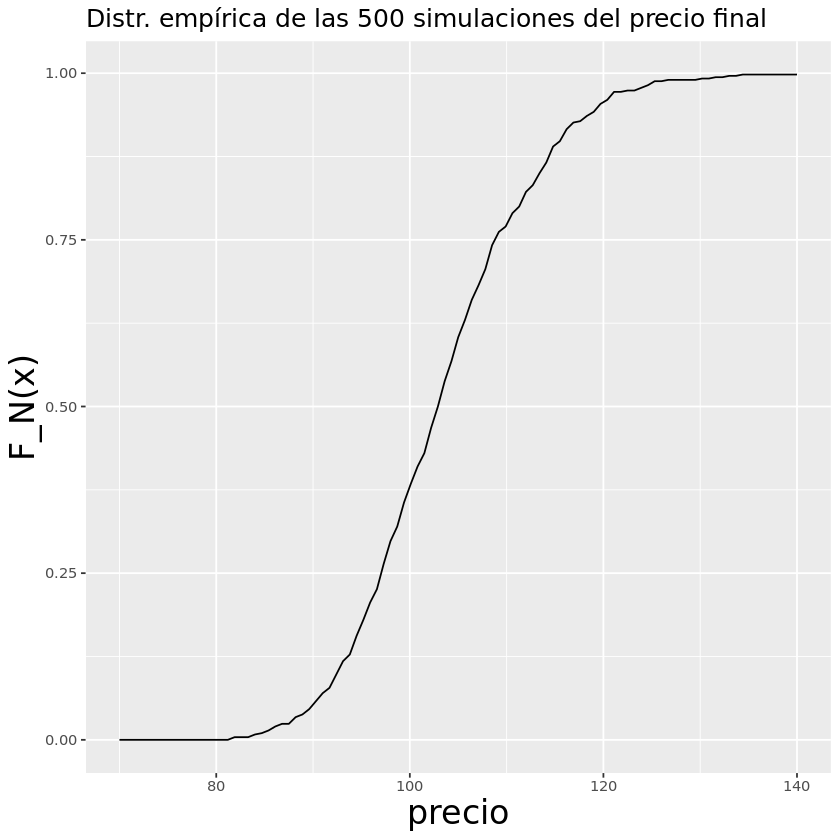

In [31]:
pfin <-  plotfig+geom_function(fun=ecdf(PT))+
         xlim(70,140)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de las ",N," simulaciones del precio final")) 
pfin

### Porcentaje de datos menor que un valor específico (p.e. \$105)

In [ ]:
e <- ecdf(PT)  #función distribución empírica 

sprintf("Probabilidad que precio final<=%5.2f = %5.2f",105,e(105))

### Calculemos un intervalo de confianza para el precio ESPERADO en $T$

In [ ]:
m <- mean(PT)
lower <- m-1.96*sd(PT)/sqrt(N)
upper <- m+1.96*sd(PT)/sqrt(N)

sprintf("Media=%5.2f",m)
sprintf("Intervalo de confianza 95%%: [%5.2f,%5.2f]",lower,upper)

### ¿Qué concluimos? ¿Que en  PROMEDIO el precio de esa acción sube en torno a 4%?

### OJO! No podemos comparar valores monetarios en periodos distintos. Hay que corregirlos usando una tasa de descuento $r$:

### $P_0(t)=P(t)*e^{-rt}$   (valor $P(t)$ en el periodo 0)

### o

### $P_t(0)=P(0)*e^{rt}$   (valor $P(0)$ en el periodo t)

### Por ejemplo, el valor del precio inicial corregido a $T=$6 meses (=$0,5$ años), a una tasa anual de $r$=3%, es

### $P_T(0)=P(0)*e^{rT}$

In [ ]:
r <- 0.03  #Tasa anual
P0_T  <- P0*exp(r*0.5)
sprintf("Precio inicial corregido al periodo T=%5.2f",P0_T)

## Ploteemos ahora una evolución de precios

### Tenemos que generar los precios para cada semana; para ello, generamos el precio de la semana $t$ (o sea, periodo $t/52$) en función del precio en la semana $t-1$ (periodo $(t-1)/52$): $$P(t)=P(t-1)\exp\left((\mu-\sigma^2/2)\frac{1}{52}+ \sigma\sqrt{\frac{1}{52}}\,Z_t, \quad Z_t\sim \text{Normal}(0,1)\right)$$

In [ ]:
set.seed(123)
N <- 501

nsem <- 26 #Nro de semanas en T=6 meses
nsem_anio <- 52 #Nro de semanas en un anio
precios <- array(rep(0,N*(nsem+1)),dim=c(N,nsem+1))
precios[,1] <- P0
for (t in 1:nsem)
    {
      log_cambio <- (mu-sigma^2/2)*(1/nsem_anio) + sigma*sqrt(1/nsem_anio)*rnorm(N,0,1)
      precios[,t+1] <- precios[,t]*exp(log_cambio)
    }



In [ ]:
Nsim <-500
precios_df <- as.data.frame(precios[1:(Nsim+1),])
names(precios_df) <- 0:nsem
precios_df$n <- 1:(Nsim+1)
plotdata <- precios_df %>% tidyr::gather("semana", "precio",0:nsem+1) 
plotdata <- data.table(plotdata)
plotfig <- ggplot(plotdata[n<=Nsim], aes(as.numeric(semana),precio,group=n,color=n)) +
            geom_line(show.legend = F)+
            ylim(70,140)+
            theme(plot.title = element_text(size = 15),
                  axis.title.y=element_text(size = 20),
                  axis.title.x=element_text(size = 20))+
            labs(y="Precio",
                x="Semana",
                title=paste0("Gráfico de precios para ",Nsim," simulaciones de ",nsem," semanas"))

rsem <- r/nsem_anio #tasa semanal
cons <- data.frame(n=N+1,semana=0:nsem,precio=P0*exp(rsem*(0:nsem))) #Para graficar valor constante=P0 corregido
plotfig+geom_line(data=cons,color="red")

### Veamos un histograma de los precios en una semana arbitraria

In [ ]:
sem=10 #nsem
plotfig <- ggplot(plotdata[(semana==sem) & (n<=Nsim)],aes(precio))+
        theme(plot.title = element_text(size = 13),
              axis.title.y=element_text(size = 20),
              axis.title.x=element_text(size = 20))
 
p <- plotfig+geom_histogram(aes(y = after_stat(count / sum(count))), binwidth=5, color="black", fill="gray")+
       labs(x="precio",
            y="frecuencia",
            title=paste0("Histograma de las ",Nsim," simulaciones del precio en la semana ",sem))

p <- p+ geom_vline(aes(xintercept=P0*exp(rsem*sem)), #Valor inicial corregido a la semana indicada
            color="red", linetype="dashed", size=1)
            
p 

### Veamos la distribución empírica en el periodo final

In [ ]:
plotfig_emp <- plotfig+geom_function(fun=ecdf(plotdata[(semana==nsem) & (n<=Nsim),precio]), color="black")+
                xlim(70,140)+
                labs(x="precio",y="F_N(x)",
                title=paste0("Distr. empírica de las ",Nsim," simulaciones del precio final")) 
plotfig_emp


### Comparemos con la simulación anterior, cuando simulamos directamente el periodo $T$:

In [ ]:
plotfig_emp+geom_function(fun=ecdf(PT), color="red")

### Comparemos ahora ambas distribuciones con la distribución teórica, i.e. $$\frac{P(T)}{P(0)} \sim \text{Lognormal}\left((\mu-\sigma^2/2)T,\sigma\sqrt{T}\right)$$

In [ ]:
plotfig+geom_function(fun=ecdf(plotdata[(semana==nsem) & (n<=Nsim),precio]/P0), color="black")+
        geom_function(fun=ecdf(PT/P0), color="red")+
        geom_function(fun=plnorm,args=list((mu-sigma^2/2)*T,sigma*sqrt(T)),color="blue")+
        xlim(0.7,1.40)+
        labs(x="precio",y="F_N(x)",
        title=paste0("Distr. empírica de las ",Nsim," simulaciones del precio final")) 
